# **Project Name**    - FBI Crime Investigation Project



##### **Project Type**    - EDA
##### **Contribution**    - Individual
Keshav Yadav


# **Project Summary -**

The FBI Crime Investigation Project uses data to predict crime and make communities safer. Lately cities in the United States have seen more crime and complicated crime patterns. To fix this law enforcement needs better tools to guess crime trends by useing their resources wisely and stop crimes before they happen. This project will create a system that predicts how many crimes will happen each month. It uses detailed information like the type of crime where and when it happened (including the exact location and time of day) and neighborhood details. This helps to understand crime patterns in terms of both location and time. By knowing when and where crimes are most likely police can plan patrols better send officers where they're needed most and use their resources more effectively. The project uses several computer programming tools. Pandas helps manage and clean large amounts of crime data. NumPy is used for calculations. Scikit-Learn helps build and check machine learning models. Statsmodels is for understanding crime trends over time. XGBoost is an advanced tool for making predictions. Matplotlib and Seaborn are used to show data visually like crime locations and how well the prediction model works. The project follows a set of steps first understanding the problem and exploring the data, then cleaning the data by handling missing information and unusual data points. After that new features are created from the data and the data is prepared for the models. Finally different prediction models are built and tested to see which one works best. The success of the project is judged on how well it understands the data and how accurate its predictions are.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Law enforcement agencies in cities face a big challenge with rising crime rates and the difficulty in knowing when and where crimes might happen. This project aims to solve this by building a system that can predict the number of crime incidents each month for different crime types. The goal is to provide better foresight so police can use their resources more effectively and proactively work to make our communities safer.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

### Dataset Loading

In [3]:
df= pd.read_excel("..\Datasets\Train.xlsx")

### Dataset First View

In [4]:

df.sample(5) # To see random 5 rows from the dataset

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
294561,Theft from Vehicle,40XX W 13TH AVE,West Point Grey,485742.64,5456483.07,49.260946,-123.195952,10.0,4.0,2006,6,7,2006-06-07
362694,Offence Against a Person,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,0.000000,0.000000,NaN,NaN,2008,8,12,2008-08-12
238182,Theft from Vehicle,11XX ROBSON ST,West End,490783.76,5459244.56,49.285883,-123.126731,10.0,20.0,2004,7,26,2004-07-26
128087,Mischief,E 28TH AVE / KAMLOOPS ST,Renfrew-Collingwood,496051.65,5454741.48,49.245434,-123.054249,0.0,0.0,2001,7,5,2001-07-05
341535,Mischief,GRANVILLE ST / W 41ST AVE,Kerrisdale,489835.55,5453516.55,49.234344,-123.139624,10.0,39.0,2007,8,30,2007-08-30


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f"Total Number of Rows: {df.shape[0]} \nTotal Number of Columns: {df.shape[1]}")

Total Number of Rows: 474565 
Total Number of Columns: 13


### Dataset Information

In [6]:
# Dataset Info
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f"Numbers of Duplicate Value: {df.duplicated().sum()} out of {len(df)}")

Numbers of Duplicate Value: 44618 out of 474565


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print("--- Checking for Missing Values ---")
df.isnull().sum()

--- Checking for Missing Values ---


TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

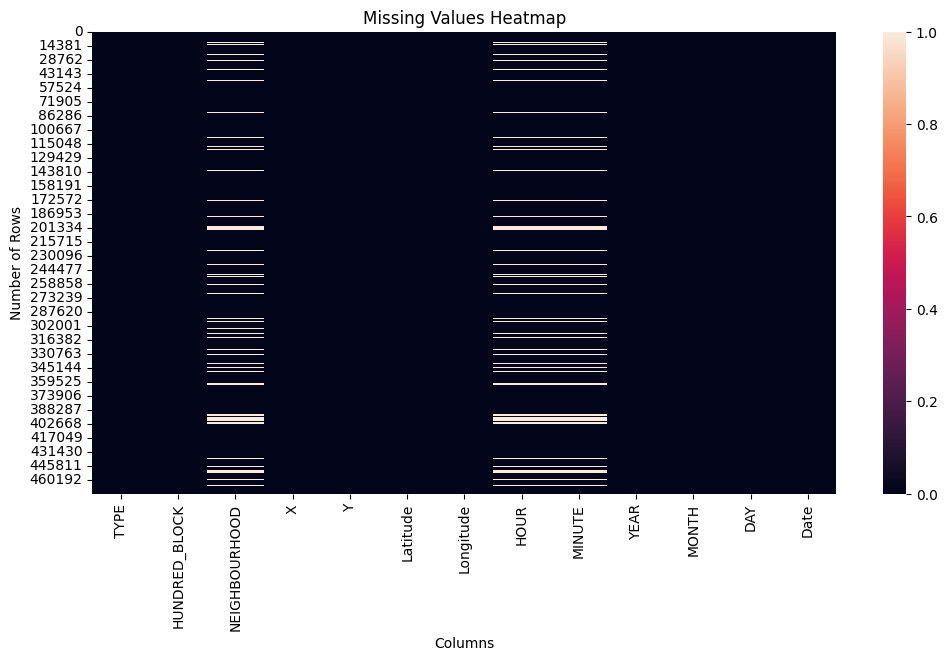

In [10]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Number of Rows')
plt.show()

### What did you know about your dataset?

So my train data have 474565 Rows and 13 columns: `TYPE`, `HUNDRED_BLOCK`, `NEIGHBOURHOOD`,`X`, `Y`, `Latitude`, `Longitude`, `HOUR`, `MINUTE`, `YEAR`, `MONTH`, `DAY`, `Date`. and in some columns like `HUNDRED_BLOCK`, `NEIGHBOURHOOD`, `HOUR` , `MINUTE` there are some missing values


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
for var in df.columns: # using for loop to print all the columns in the dataset with its data type
    print(f"{var}: {df[var].dtype}")

TYPE: object
HUNDRED_BLOCK: object
NEIGHBOURHOOD: object
X: float64
Y: float64
Latitude: float64
Longitude: float64
HOUR: float64
MINUTE: float64
YEAR: int64
MONTH: int64
DAY: int64
Date: datetime64[ns]


In [10]:
# Dataset Describe
df.describe() # summary statistics of the dataset

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

for var in df.columns: # usning for loop to get unique values in each column
    print(f"Unique values for {var}: {df[var].nunique()}") 

Unique values for TYPE: 9
Unique values for HUNDRED_BLOCK: 20566
Unique values for NEIGHBOURHOOD: 24
Unique values for X: 84225
Unique values for Y: 82768
Unique values for Latitude: 89488
Unique values for Longitude: 87190
Unique values for HOUR: 24
Unique values for MINUTE: 60
Unique values for YEAR: 13
Unique values for MONTH: 12
Unique values for DAY: 31
Unique values for Date: 4748


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# Step 1 : Create a copy of the DataFrame to work.
wrangled_df = df.copy()
print("Created a working copy of the DataFrame: 'wrangled_df'")

Created a working copy of the DataFrame: 'wrangled_df'


In [13]:
# Step 2 : Handle Duplicate Values

print(f"Numbers of Duplicate Value: {wrangled_df.duplicated().sum()} out of {len(wrangled_df)}")

print(f"Removed {wrangled_df.duplicated().sum()} duplicate rows.")
wrangled_df.drop_duplicates(inplace=True)
print(f"Numbers of Duplicate Value after removal: {wrangled_df.duplicated().sum()} out of {len(wrangled_df)}")

Numbers of Duplicate Value: 44618 out of 474565
Removed 44618 duplicate rows.
Numbers of Duplicate Value after removal: 0 out of 429947


In [14]:
# Step 3: Handle Missing Values

# Display missing values before handling
missing_values = wrangled_df.isnull().sum()
print("Missing values before handling")
print(missing_values[missing_values > 0])

# For numerical missing values(HOUR, MINUTE) with their median
# Identify numerical columns with missing values
numerical_col = ['HOUR', 'MINUTE']

for col in numerical_col:
    if col in wrangled_df.columns and wrangled_df[col].isnull().any():
        median_val = wrangled_df[col].median()
        wrangled_df[col] = wrangled_df[col].fillna(median_val)
        print(f"Filled missing values in numerical column '{col}' with median: {median_val}")
    else:
        print(f"Column '{col}' not found or has no missing values to impute numerically.")



Missing values before handling
HUNDRED_BLOCK      13
NEIGHBOURHOOD    6873
HOUR             4747
MINUTE           4747
dtype: int64
Filled missing values in numerical column 'HOUR' with median: 15.0
Filled missing values in numerical column 'MINUTE' with median: 10.0


In [15]:
# For categorical missing values(HUNDRED_BLOCK, NEIGHBOURHOOD) with their mode
# Identify categorical columns with missing values
categorical_cols = ['HUNDRED_BLOCK', 'NEIGHBOURHOOD'] 

for col in categorical_cols:
    if col in wrangled_df.columns and wrangled_df[col].isnull().any():
        mode_val = wrangled_df[col].mode()[0] # .mode()[0] is used because mode() can return multiple values
        wrangled_df[col] = wrangled_df[col].fillna(mode_val)
        print(f"Filled missing values in categorical column '{col}' with mode: '{mode_val}'")
    else:
        print(f"Column '{col}' not found or has no missing values to impute categorically.")

Filled missing values in categorical column 'HUNDRED_BLOCK' with mode: 'OFFSET TO PROTECT PRIVACY'
Filled missing values in categorical column 'NEIGHBOURHOOD' with mode: 'Central Business District'


In [16]:
# Verify missing values after handling
verify_missing_values = wrangled_df.isnull().sum()
if verify_missing_values.sum() == 0:
    print("\nAll missing values handled.")
else:
    print("\nRemaining missing values after handling:")
    print(verify_missing_values[verify_missing_values > 0])

print("\nUpdated DataFrame info after missing value handling:")
verify_missing_values


All missing values handled.

Updated DataFrame info after missing value handling:


TYPE             0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
HOUR             0
MINUTE           0
YEAR             0
MONTH            0
DAY              0
Date             0
dtype: int64

### What all manipulations have you done and insights you found?

I remove all the duplicate values form my data and after that I fill all the missing values for numerical missing values `HOUR`, `MINUTE` with their median and for categorical missing values `HUNDRED_BLOCK`, `NEIGHBOURHOOD` with their mode


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

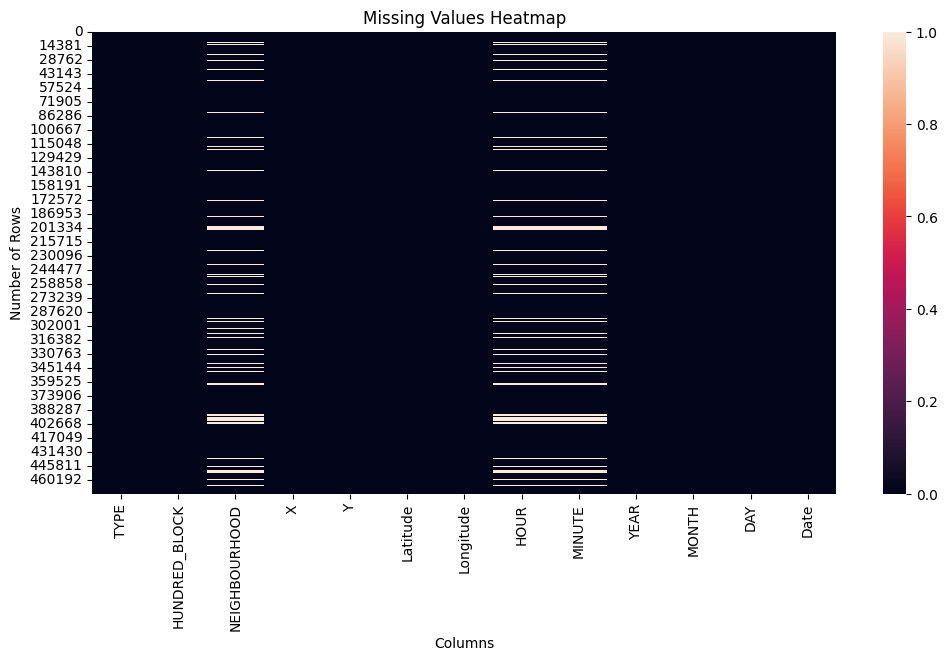

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Number of Rows')
plt.show()

##### 1. Why did you pick the specific chart?

I choose heatmap because it quickly shows where data is missing and makes it easy to see empty spots in a large dataset

##### 2. What is/are the insight(s) found from the chart?

Many values are missing in columns like `HUNDRED_BLOCK`, `NEIGHBOURHOOD`, and time details `HOUR`, `MINUTE`. However columns like 'TYPE', 'YEAR', and 'MONTH' are mostly complete

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes these insights will help a lot. By knowing where data is missing we can clean it and make the crime predictions more accurate

#### Chart - 2

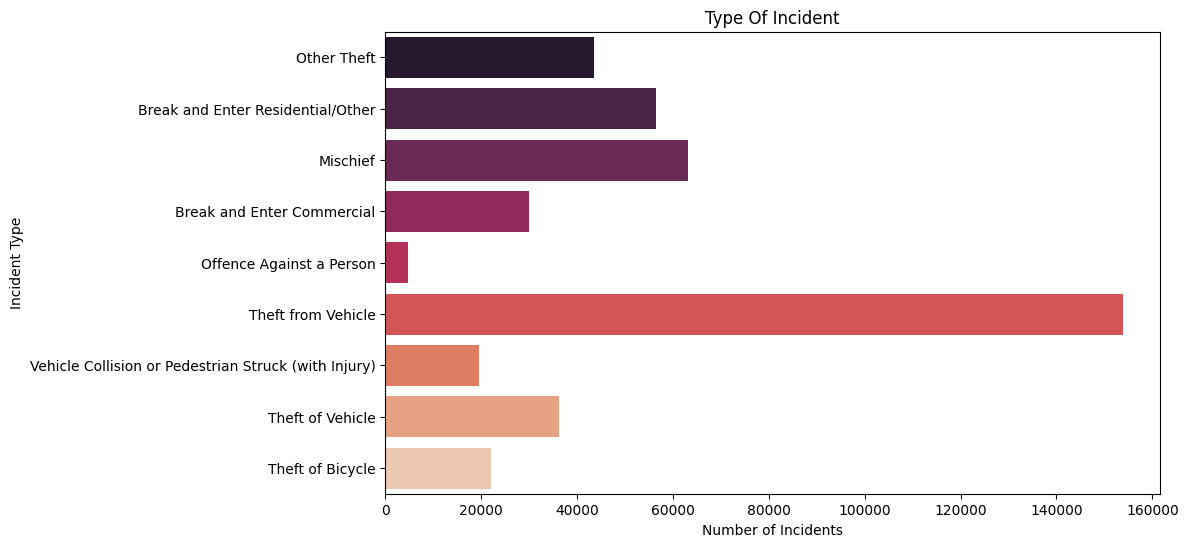

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wrangled_df, y='TYPE',palette='rocket')
plt.title('Type Of Incident')
plt.xlabel('Number of Incidents')
plt.ylabel('Incident Type')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar is used here because it easly visualizes the different incident types against the number of incidents. 

##### 2. What is/are the insight(s) found from the chart?

`Theft from Vehicle` is the most common incident(150000) and `Mischief` is the second most common (60000).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights from this chart will definitely create a positive business impact for the FBI Crime Investigation project by Knowing that `Theft from Vehicle` is the most common incident allows law enforcement to prioritize resources such as patrols or surveillance.

#### Chart - 3

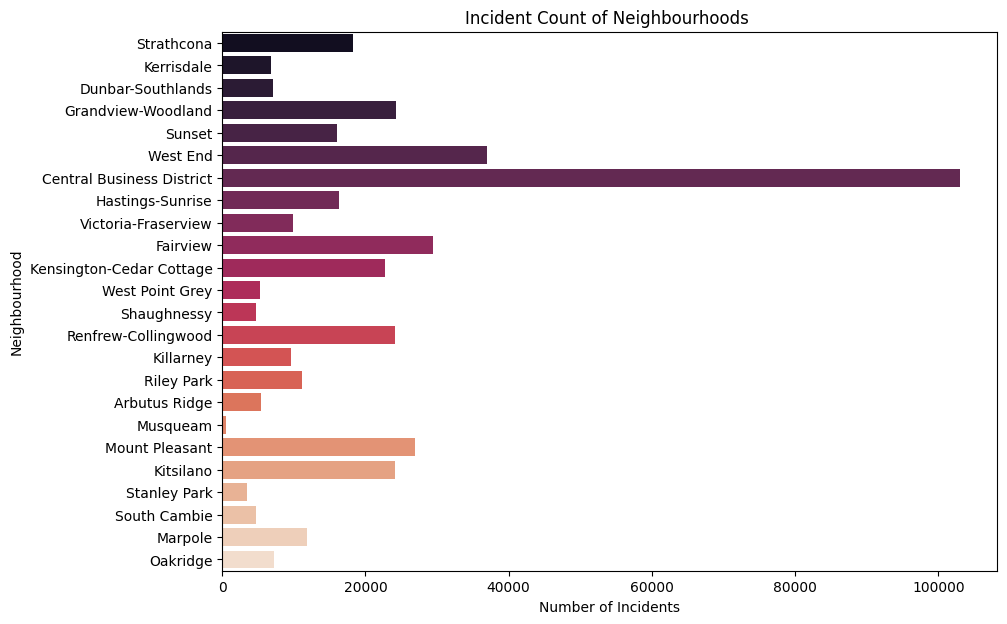

In [19]:
plt.figure(figsize=(10, 7))
sns.countplot(data=wrangled_df, y='NEIGHBOURHOOD',palette='rocket')
plt.title('Incident Count of Neighbourhoods ')
plt.xlabel('Number of Incidents')
plt.ylabel('Neighbourhood')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is usefull to display the "Number of Incidents" for various "Neighbourhoods." It effectively ranks the neighborhoods by incident count making it easy to see which areas have the most or fewest incidents.

##### 2. What is/are the insight(s) found from the chart?

"Central Business District" has the highest incident count with over 100,000 incidents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart will definitely create a positive business impact beacause Law enforcement can use this information to strategically deploy more patrols and resources to high-incident neighborhoods like the "Central Business District".

#### Chart - 4

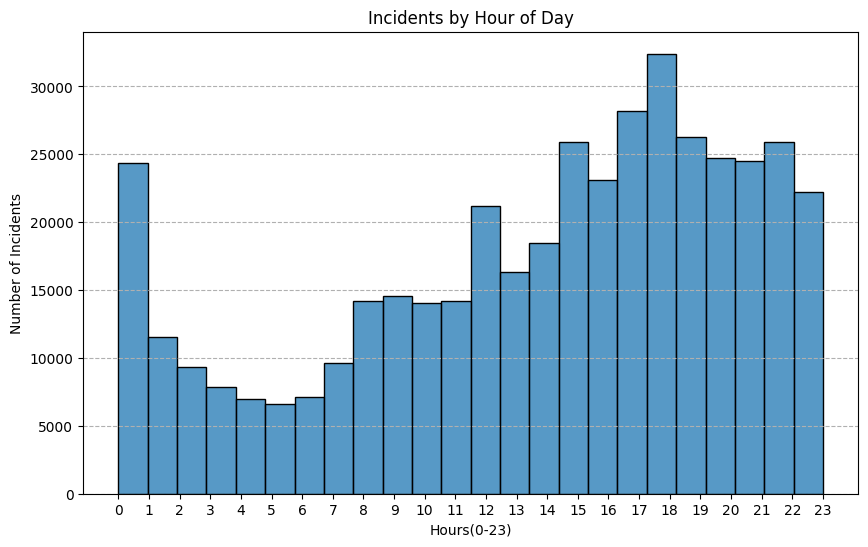

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(wrangled_df['HOUR'], bins=24)
plt.title('Incidents by Hour of Day')
plt.xlabel('Hours(0-23)')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for visualizing "Incidents by Hour of Day." It clearly displays the frequency of incidents for each hour allowing for easy identification of peak and low crime periods.

##### 2. What is/are the insight(s) found from the chart?

From the "Incidents by Hour of Day" chart we can derive several insights. There are two main peaks in incidents. The highest peak occurs around 5 PM to 7 PM (hours 17-19) with the highest single hour is 6 PM (hour 18) having over 30,000 incidents. There's also a noticeable peak around midnight (hour 0) with nearly 25,000 incidents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Law enforcement agencies can use these insights to deploy more officers during peak incident hours (5 PM to 7 PM and around midnight) and reduce patrols during low-incident hours making resource allocation much more efficient.

#### Chart - 5

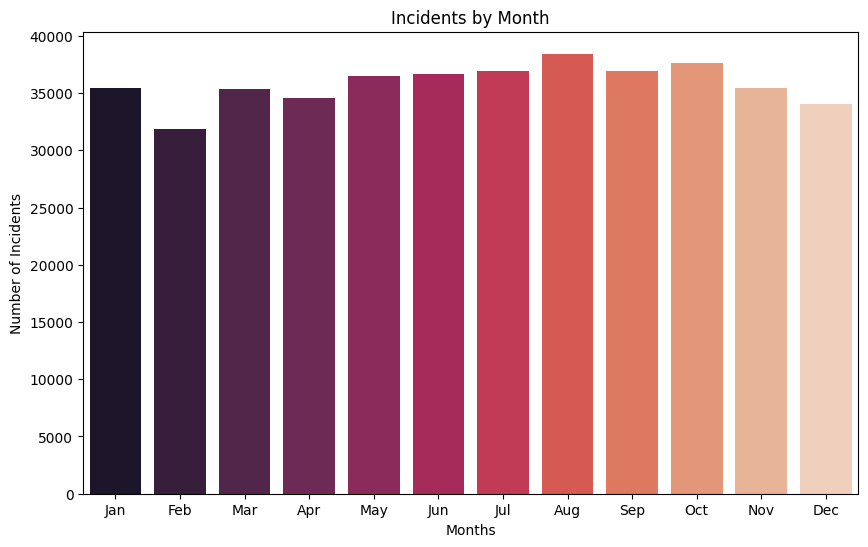

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wrangled_df, x='MONTH', palette='rocket')
plt.title('Incidents by Month')
plt.xlabel('Months')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is effective for visualizing "Incidents by Month" because it clearly shows the total number of incidents for each month. This allows for easy comparison of crime frequency across the year helping to identify seasonal patterns.

##### 2. What is/are the insight(s) found from the chart?

From the "Incidents by Month" chart we see that incidents generally increase from February peaking in the summer months like August, September, and October with over 37,000 incidents each. January also shows a high number of incidents around 35,000. February has the lowest number of incidents dropping below 32,000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes these insights will help create a positive business impact. Knowing which months have higher crime rates allows law enforcement to plan for increased staffing and resources during peak seasons such as in late summer and early autumn. 

#### Chart - 6

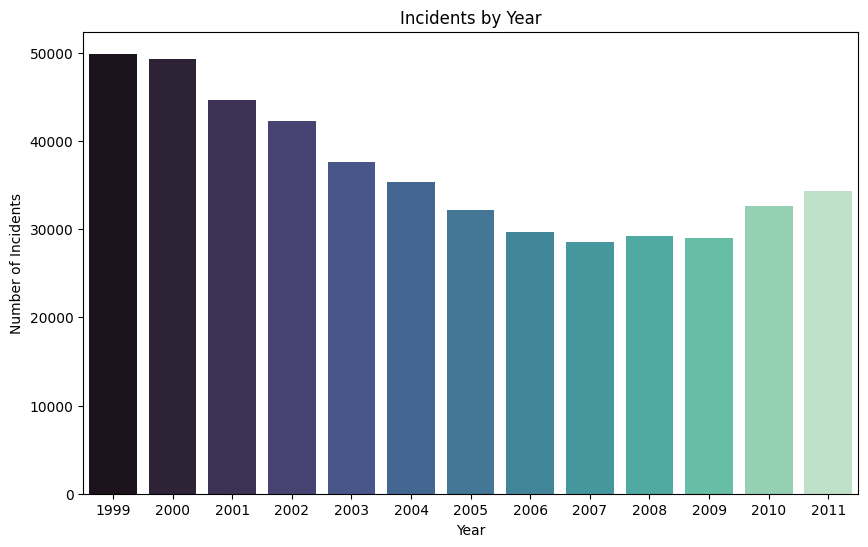

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='YEAR', palette='mako')
plt.title('Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is effective for showing "Incidents by Year" because it clearly displays the total number of incidents for each year. This makes it easy to observe trends over time such as increases or decreases in crime.

##### 2. What is/are the insight(s) found from the chart?

From the "Incidents by Year" chart we can see that incidents were very high in 1999 and 2000 close to 50,000. There was a general decrease in incidents from 1999 to 2009 reaching a low point around 29,000. However there's a slight increase in incidents from 2009 to 2011.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights will help create a positive business impact by identifying periods of increase or decrease can inform resource allocation and policy changes over time leading to more adaptive and effective crime prevention efforts.

#### Chart - 7

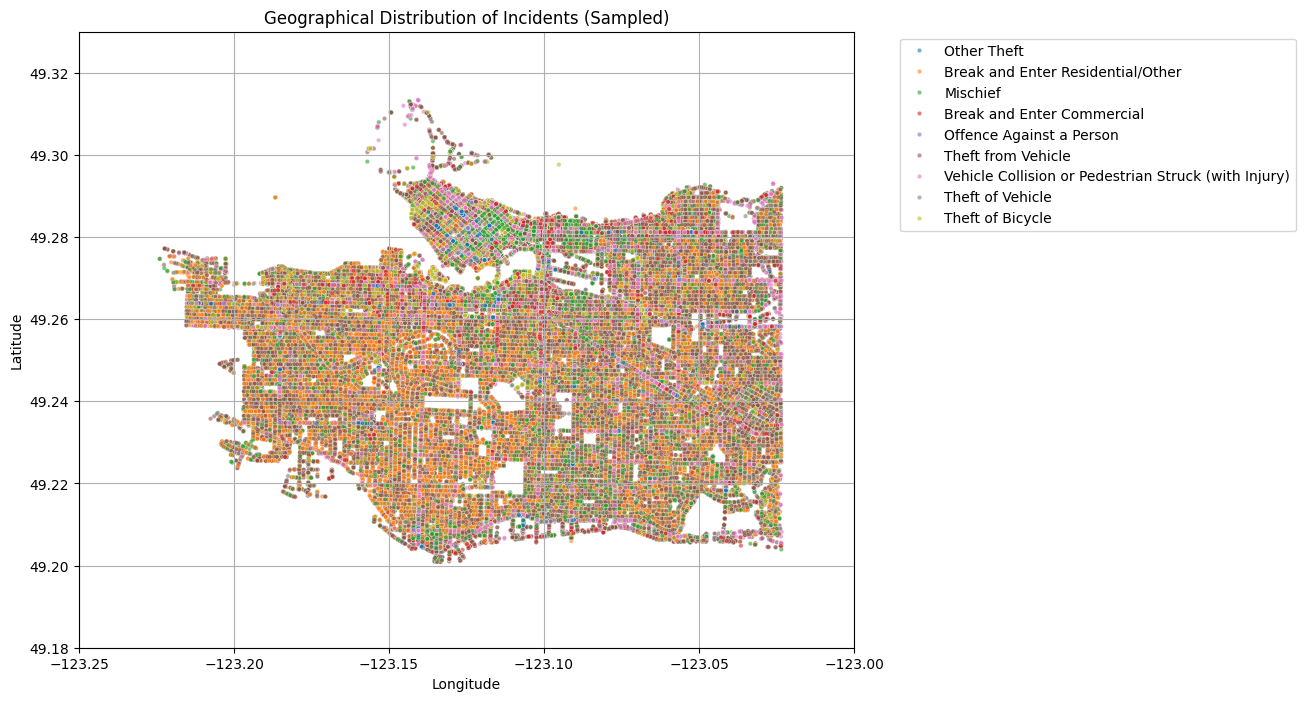

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=wrangled_df, x='Longitude', y='Latitude', hue='TYPE', s=10, alpha=0.6, palette='tab10')
plt.title('Geographical Distribution of Incidents (Sampled)')
plt.xlabel('Longitude')
plt.ylabel('Latitude',)
plt.xlim(-123.250, -123.000) 
plt.ylim(49.18,49.33) 
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### 1. Why did you pick the specific chart?

This scatter plot is useful for showing where incidents happen geographically. It displays data points on a map which helps to visually identify crime hotspots or areas with no incidents. Using different colors for incident types helps to see if certain crimes are concentrated in specific locations.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that incidents are spread across a wide area generally following the urban layout. It appears that many incidents are concentrated in the central and more densely populated parts of the city.

##### 3. Will the gained insights help creating a positive business impact?

Yes, this map is crucial for impact. It allows law enforcement to see the overall geographical spread of crime, helping them understand where to focus general patrol efforts.

#### Chart - 8

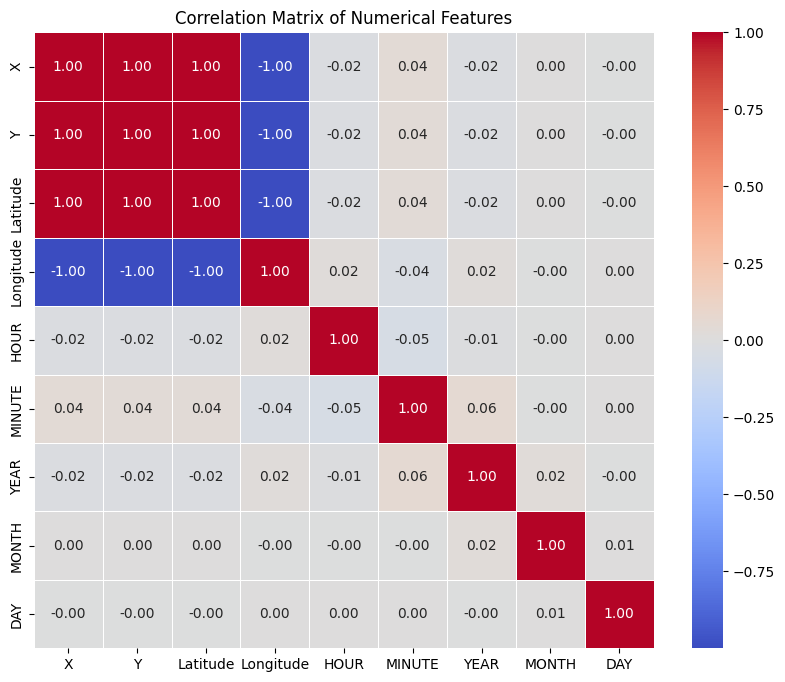

In [24]:
numerical_df = wrangled_df[['X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY']].copy()
correlation_matrix = numerical_df.dropna().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is chosen to understand how numerical features in the data relate to each other. It uses colors and numbers to show the strength and direction of these relationships.

##### 2. What is/are the insight(s) found from the chart?

'X', 'Y', and 'Latitude', 'Longitude' are strongly related, as expected, because they all represent location coordinates. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding correlations helps in selecting the right features for the predictive model.

#### Chart - 9

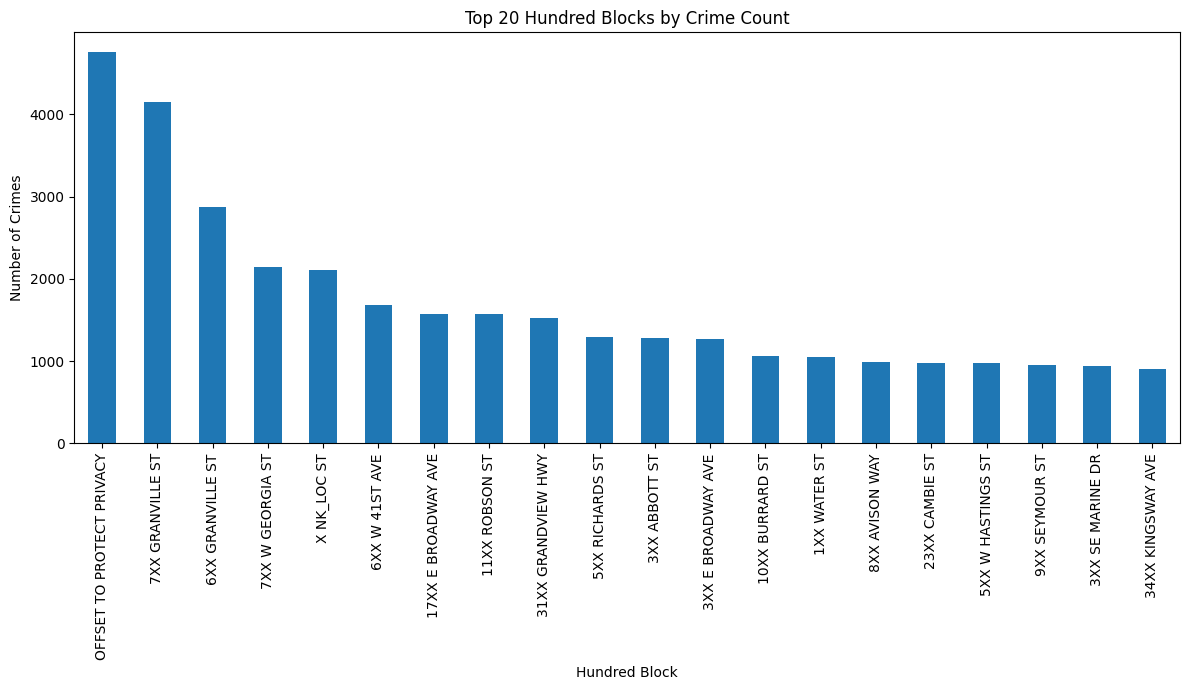

In [25]:
plt.figure(figsize=(12, 7))
wrangled_df['HUNDRED_BLOCK'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 Hundred Blocks by Crime Count')
plt.xlabel('Hundred Block')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart was selected to highlight the specific street blocks with the highest number of reported crimes. It quickly identifies the top 20 most problematic areas making it easy to see where crime is mostly occurs.

##### 2. What is/are the insight(s) found from the chart?

"OFFSET TO PROTECT PRIVACY" and "7XX GRANVILLE ST" are the two blocks with the highest crime counts each exceeding 4,000 incidents. 

##### 3. Will the gained insights help creating a positive business impact?

Absolutely this chart provides critical insights for business impact. Law enforcement can use this to deploy highly patrols directly to these top crime blocks. 

#### Chart - 10

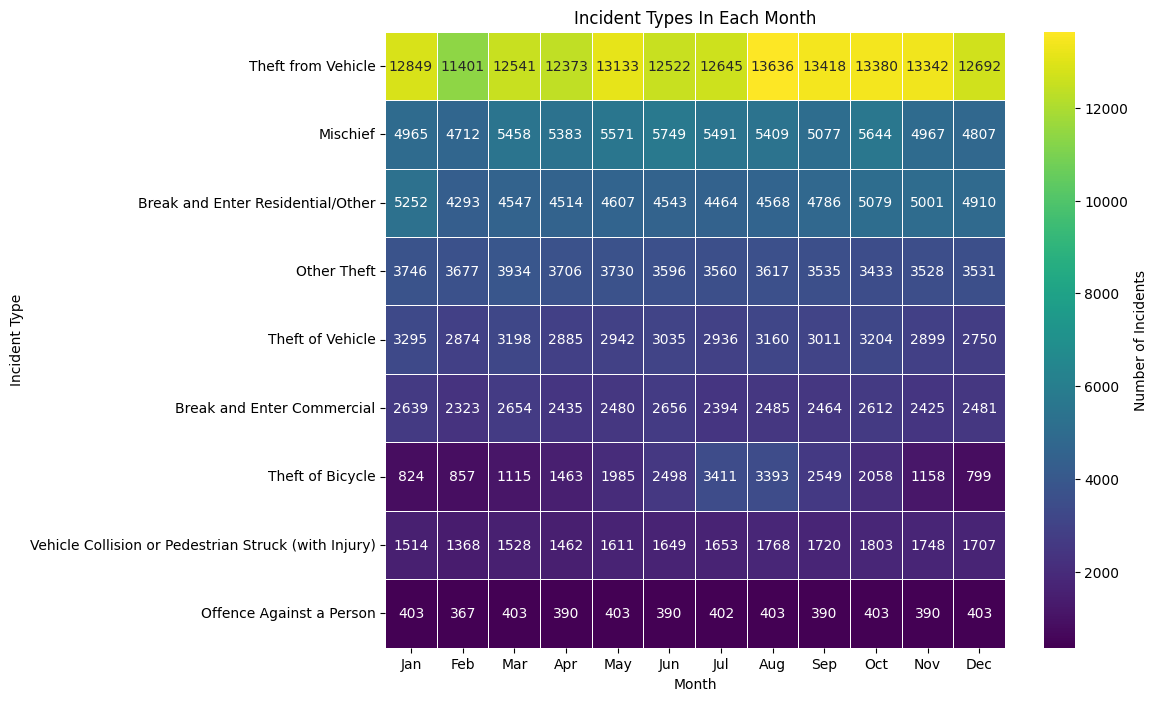

In [26]:
all_months = range(1, 13)

monthly_type_counts = wrangled_df.groupby(['TYPE', 'MONTH']).size().unstack(fill_value=0)
monthly_type_counts = monthly_type_counts.reindex(columns=all_months, fill_value=0)

month_names_short = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_type_counts.columns = [month_names_short[col] for col in monthly_type_counts.columns]

monthly_type_counts['Total'] = monthly_type_counts.sum(axis=1)
monthly_type_counts = monthly_type_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

plt.figure(figsize=(10, 8))
sns.heatmap(
    monthly_type_counts,
    cmap='viridis',
    annot=True,
    fmt='d',
    linewidths=.5,
    cbar_kws={'label': 'Number of Incidents'}
)
plt.title('Incident Types In Each Month')
plt.xlabel('Month')
plt.ylabel('Incident Type')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is very useful here because it shows two categorical variables (Incident Type and Month) against a numerical value (Number of Incidents). The color intensity easily highlights which incident types are more common in specific months.

##### 2. What is/are the insight(s) found from the chart?

"Theft from Vehicle" consistently remains the highest incident type across all months showing a peak in summer (July-August) and slightly lower in winter. "Offence Against a Person" is consistently the lowest incident type each month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes these insights are highly valuable for business impact. Knowing the seasonal trends of specific crime types allows police to adjust their strategies throughout the year. For example, they can increase patrols for bicycle theft in summer

#### Chart - 11

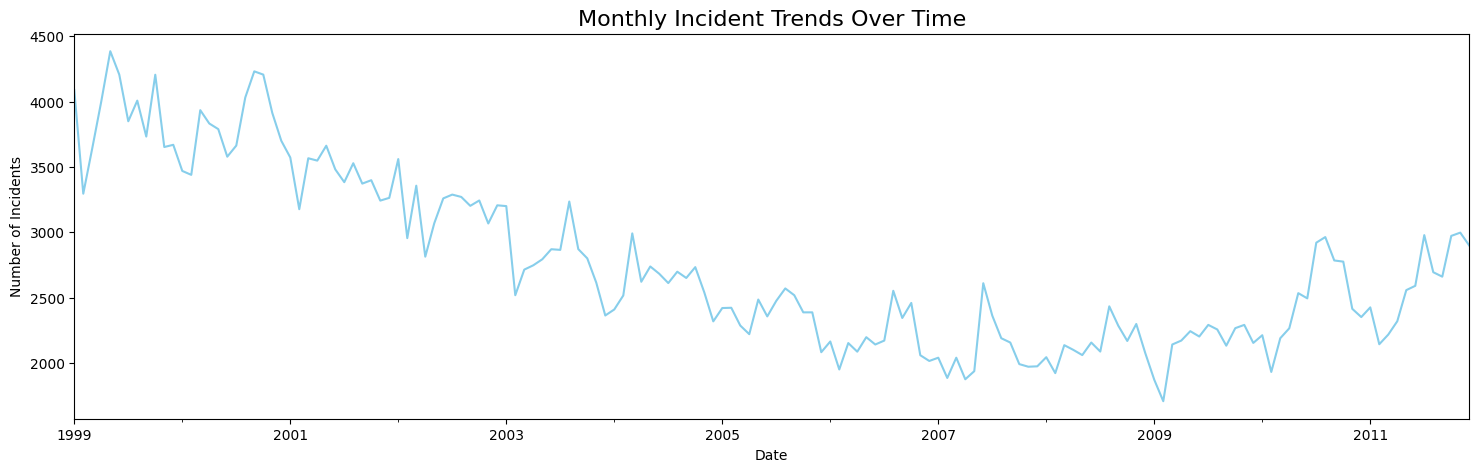

In [29]:
time_series_data = wrangled_df.copy() # copy the data 

# We will use the date column as the index of the time series data
time_series_data.set_index('Date',inplace=True)

plt.figure(figsize=(18, 5)) 
time_series_data.resample('ME').size().plot(kind='line', color='skyblue', linewidth=1.5) 
plt.title('Monthly Incident Trends Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Incidents') 
plt.show()

##### 1. Why did you pick the specific chart?

This line chart is used to show how the number of incidents changes each month over many years. It is good for seeing long-term trends and any repeating patterns or ups and downs in crime over time. It provides a smooth view of monthly changes.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a general downward trend in the number of incidents from 1999 to around 2009. After 2009 there seems to be a slight upward trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes these insights create a positive business impact. Understanding long-term trends helps in strategic planning and evaluating the overall effectiveness of crime reduction efforts. 

#### Chart - 12

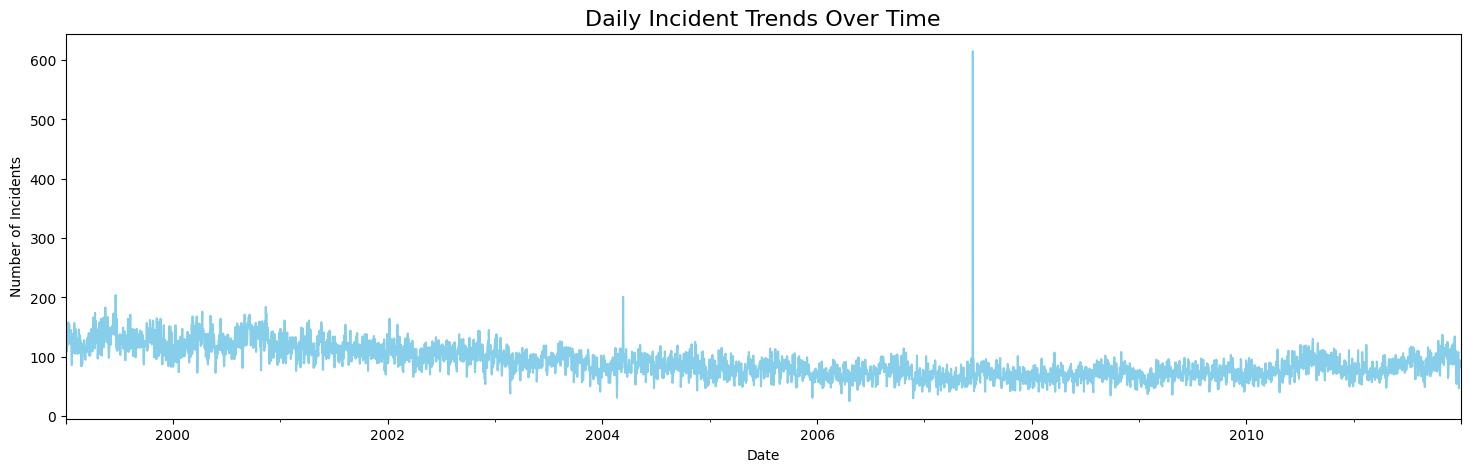

In [30]:
plt.figure(figsize=(18, 5)) 
time_series_data.resample('D').size().plot(kind='line', color='skyblue', linewidth=1.5) 
plt.title('Daily Incident Trends Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Incidents') 
plt.show()

##### 1. Why did you pick the specific chart?

This line chart displays the number of incidents on a daily basis over many years. It is chosen to observe very short-term variations and identify any sudden spikes or unusual daily occurrences in crime. 

##### 2. What is/are the insight(s) found from the chart?

The chart generally shows consistent daily incident counts mostly below 200. There are a few very prominent spikes especially a massive one in late 2007 indicating an unusually high number of incidents on specific days.

# **Conclusion**

The FBI's crime forecasting project uses data to predict crime patterns aiming to make communities safer. By analyzing past incidents—their type, location, and time—the project builds a model to forecast monthly crime numbers. Insights show "Theft from Vehicle" is common, the "Central Business District" has high crime, and crime peaks in evenings. This intelligence allows police to better allocate resources, targeting specific areas and times

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***